# Variações na constante temporal de membrana $\tau$

A constante de membrana determina a taxa de decaímento ou crescimento do potencial de membrana ao valor de $V_\infty$. Ela é o produto da resistência pela capacitância, determinadas através do estudo da biofísica da membrana. 

$$
\tag{1}
 \frac{dV}{dt} \propto \frac{1}{\tau} \quad \quad \tau = RC
$$

> A dinâmica do modelo integra e dispara é melhor explicada em: [Modelagem Integra e Dispara Simplificada](https://github.com/notparallaxed/modelo-integra-dispara/blob/main/modelagem-integra-e-dispara-simplificado.ipynb)


## Implementação do modelo

<IPython.core.display.Javascript object>


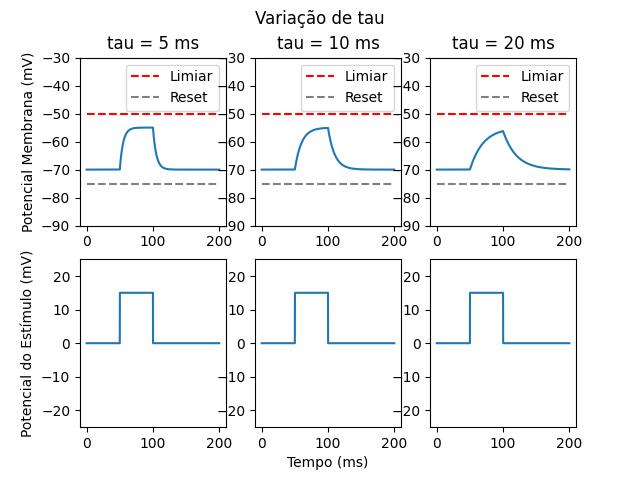

Text(0, 0.5, 'Potencial do Estímulo (mV)')

In [2]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt

# Derivada da eq. de membrana
def dt_eq_membrana(V,Vrep,Er,R,C):
    return -(V - (Vrep + Er))/R*C


# Integra e dispara método de Euler
def integra_dispara_euler(func, y0=-65, h=0.01, passos=1000, pulsos = [], limiar=-50, reset=-75, R=1,C=1):
    t = np.zeros(passos)  # Array para valores do tempo t_i 
    y = np.zeros(passos)  # Array para valores dos potenciais V_i
    I = np.zeros(passos) # Array para os estímulos aplicados a membrana
    disparos = [] #Array para guardar os disparos
    
    for pulso in pulsos:
        I[pulso['t_i']*int(1/h):pulso['t_f']*int(1/h)] = pulso['V']
            
    y[0] = y0
    for i in range(passos - 1): 
        t[i + 1] = t[i] + h 
        if y[i] >= limiar:
            disparos.append(i)
            y[i+1] = reset
        else:
            y[i + 1] =  y[i] + h*func(y[i], y0, I[i], R, C)

            

    return t, y, disparos, I

# Constantes de membrana
R = 5
C = 1
Vreset = -75
Vrep = -70
Vlim = -50

# Pulsos retangulares aplicados sobre a membrana
# t_i - tempo inicial
# t_f - tempo final
# V - potencial do pulso

pulsos_retangulares = [{'t_i': 50,'t_f': 100, 'V':15}]

resultado = [0,0,0]

# Simulação
resultado[0] = integra_dispara_euler(
    dt_eq_membrana, y0=Vrep, reset=Vreset, limiar=Vlim, pulsos=pulsos_retangulares, passos=20000, R=5, C=C)

resultado[1] = integra_dispara_euler(
    dt_eq_membrana, y0=Vrep, reset=Vreset, limiar=Vlim, pulsos=pulsos_retangulares, passos=20000, R=10, C=C)

resultado[2] = integra_dispara_euler(
    dt_eq_membrana, y0=Vrep, reset=Vreset, limiar=Vlim, pulsos=pulsos_retangulares, passos=20000, R=20, C=C)


# Plota gráfico com resultado do modelo
figure, axis = plt.subplots(2,3)
figure.suptitle("Variação de tau")

for i, axi in enumerate(axis[0]):
    axi.set_ylim([-90, -30])
    axi.hlines(-50, 0, 200, linestyle='dashed', color="red", label="Limiar")
    axi.hlines(-75, 0, 200, linestyle='dashed', color="grey", label="Reset")
    axi.plot(resultado[i][0], resultado[i][1], '-')
    axi.legend()
    
axis[0,0].set_ylabel("Potencial Membrana (mV)")
axis[0,0].title.set_text("tau = 5 ms")
axis[0,1].title.set_text("tau = 10 ms")
axis[0,2].title.set_text("tau = 20 ms")

# Plota gráfico dos estímulo
for i, axi in enumerate(axis[1]):
    axi.set_ylim([-25, 25])
    axi.plot(resultado[i][0], resultado[i][3])


axis[1,1].set_xlabel("Tempo (ms)")
axis[1,0].set_ylabel("Potencial do Estímulo (mV)")



## Efeitos de pulsos retangulares sobre um mesmo valor de $\tau$

$\tau$ por ditar a velocidade na qual as variações no potencial de membrana ocorrem, também dita o processo de integração neuronal de sinais. A somação de dois pulsos dependerá do tempo em que o decaimento/crescimento do pulso ocorrerá em relação a sua duração. Pulsos curtos para um valor de tau grande não modificação significantemente o potencial de membrana quanto pulsos longos. Da mesma forma, um tau pequeno permitirá que pulsos curtos modifiquem significativametne o potencial de membrana.

<IPython.core.display.Javascript object>


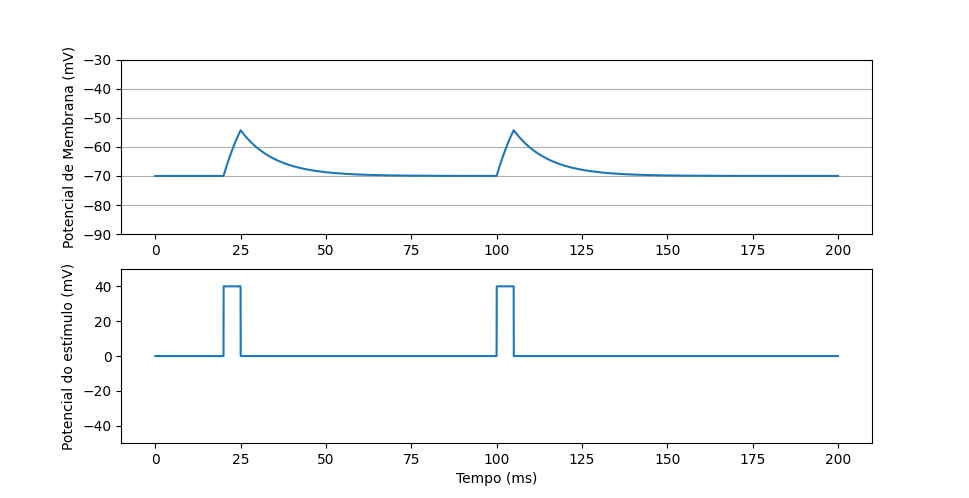

In [41]:
# Pulsos retangulares aplicados sobre a membrana
# t_i - tempo inicial
# t_f - tempo final
# V - potencial do pulso

pulsos_retangulares = [{'t_i': 20,'t_f': 25, 'V':40}, {'t_i': 100,'t_f': 105, 'V':40} ]

resultado = [0,0,0]

# Simulação
t, V, disparos, I = integra_dispara_euler(
    dt_eq_membrana, y0=Vrep, reset=Vreset, limiar=Vlim, pulsos=pulsos_retangulares, passos=20000, R=10, C=C)


figure, axis = plt.subplots(2)

axis[0].set_ylim([-90,-30])
axis[0].set_ylabel("Potencial de Membrana (mV)")
axis[0].plot(t, V)
axis[0].plot(t[disparos], V[disparos], 'or')

axis[1].set_ylabel("Potencial do estímulo (mV)")
axis[1].set_xlabel("Tempo (ms)")
axis[1].set_ylim([-50,50])
axis[1].plot(t, I)

<IPython.core.display.Javascript object>


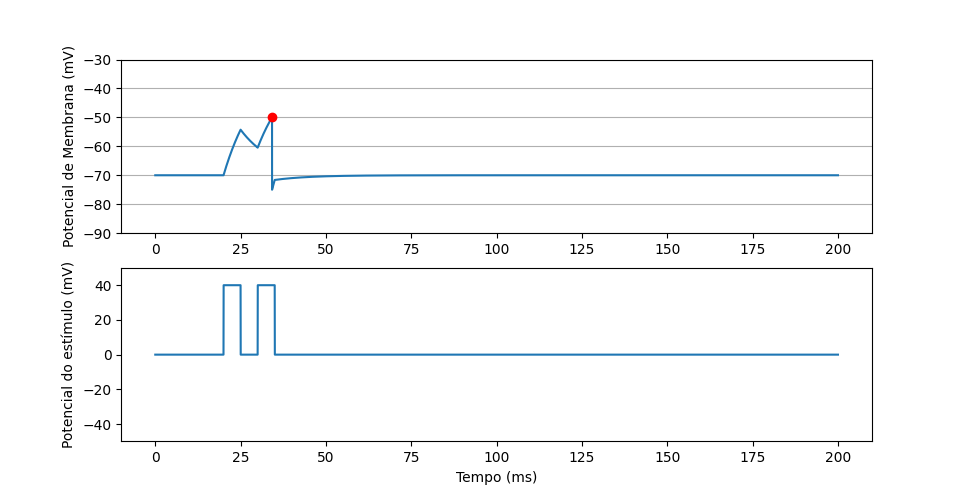

In [40]:
# Pulsos retangulares aplicados sobre a membrana
# t_i - tempo inicial
# t_f - tempo final
# V - potencial do pulso

pulsos_retangulares = [{'t_i': 20,'t_f': 25, 'V':40}, {'t_i': 30,'t_f': 35, 'V':40} ]

resultado = [0,0,0]

# Simulação
t, V, disparos, I = integra_dispara_euler(
    dt_eq_membrana, y0=Vrep, reset=Vreset, limiar=Vlim, pulsos=pulsos_retangulares, passos=20000, R=10, C=C)


figure, axis = plt.subplots(2)

axis[0].set_ylim([-90,-30])
axis[0].set_ylabel("Potencial de Membrana (mV)")
axis[0].plot(t, V)
axis[0].plot(t[disparos], V[disparos], 'or')

axis[1].set_ylabel("Potencial do estímulo (mV)")
axis[1].set_xlabel("Tempo (ms)")
axis[1].set_ylim([-50,50])
axis[1].plot(t, I)

<IPython.core.display.Javascript object>


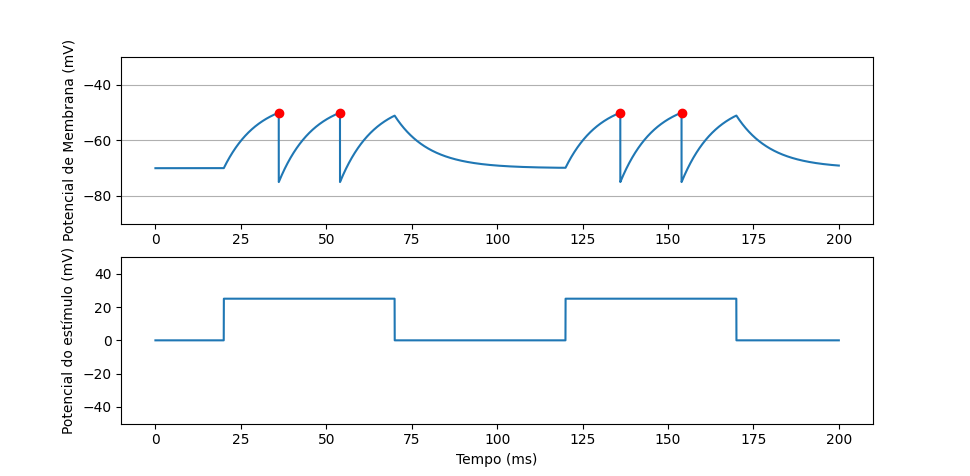

In [47]:
# Pulsos retangulares aplicados sobre a membrana
# t_i - tempo inicial
# t_f - tempo final
# V - potencial do pulso

pulsos_retangulares = [{'t_i': 20,'t_f': 70, 'V':25}, {'t_i': 120,'t_f': 170, 'V':25}   ]

resultado = [0,0,0]

# Simulação
t, V, disparos, I = integra_dispara_euler(
    dt_eq_membrana, y0=Vrep, reset=Vreset, limiar=Vlim, pulsos=pulsos_retangulares, passos=20000, R=10, C=C)


figure, axis = plt.subplots(2)

axis[0].set_ylim([-90,-30])
axis[0].set_ylabel("Potencial de Membrana (mV)")
axis[0].plot(t, V)
axis[0].plot(t[disparos], V[disparos], 'or')

axis[1].set_ylabel("Potencial do estímulo (mV)")
axis[1].set_xlabel("Tempo (ms)")
axis[1].set_ylim([-50,50])
axis[1].plot(t, I)

<IPython.core.display.Javascript object>


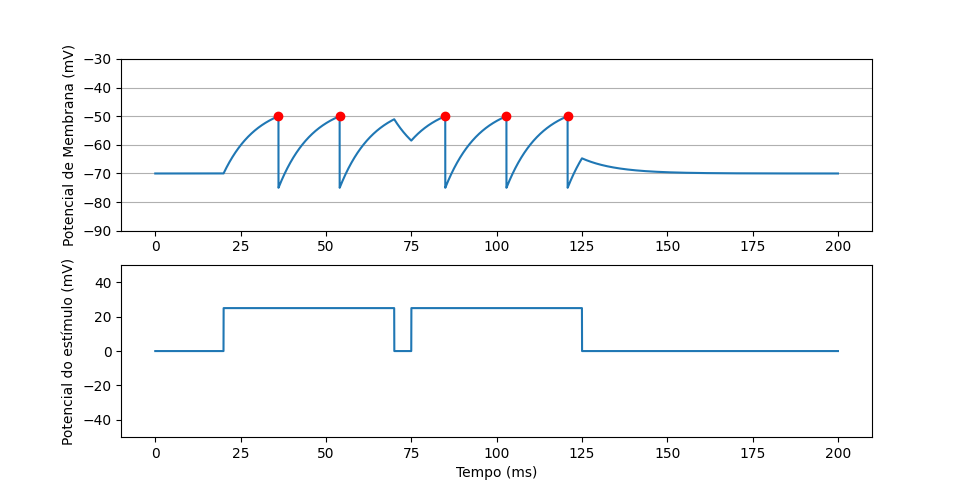

In [48]:
# Pulsos retangulares aplicados sobre a membrana
# t_i - tempo inicial
# t_f - tempo final
# V - potencial do pulso

pulsos_retangulares = [{'t_i': 20,'t_f': 70, 'V':25}, {'t_i': 75,'t_f': 125, 'V':25}   ]

resultado = [0,0,0]

# Simulação
t, V, disparos, I = integra_dispara_euler(
    dt_eq_membrana, y0=Vrep, reset=Vreset, limiar=Vlim, pulsos=pulsos_retangulares, passos=20000, R=10, C=C)


figure, axis = plt.subplots(2)

axis[0].set_ylim([-90,-30])
axis[0].set_ylabel("Potencial de Membrana (mV)")
axis[0].plot(t, V)
axis[0].plot(t[disparos], V[disparos], 'or')

axis[1].set_ylabel("Potencial do estímulo (mV)")
axis[1].set_xlabel("Tempo (ms)")
axis[1].set_ylim([-50,50])
axis[1].plot(t, I)